# Projeto 2 - Ciência dos Dados
## 2020.2 ~ 2C ~ Estudo do stat "Velocidade" dos Pokémons
### Grupo:
    -Guilherme Rameh
    -Tales Oliveira
    -Gabriella Zullo
    -João Magalhães

In [19]:
import scipy.stats as stats
from scipy.stats import t, norm, probplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, ceil
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

# Para ter melhor print
from IPython.display import display

In [20]:
# Leitura do banco de dados

dados = pd.read_csv('pokemon.csv')
dados

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.00,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.50,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,...,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,...,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,...,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,...,NaN,800,127,89,79,psychic,NaN,230.0,7,1


# Primeira Análise Exploratória
A seguir, verificaremos quais variáveis achamos interessantes de se relacionar com a velocidade dos Pokémons, que é nossa variável *Target*. Começamos printando as colunas do dataframe, pois sabendo do que se trata, podemos descartar algumas colunas logo de cara (como por exemplo as colunas referentes a quanto de dano cada ataque dá em cada tipo de Pokémon).

In [21]:
print(dados.dtypes)

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
japanese_name         object
name                  object
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense    

<b> Lembrete: Quando lidando com duas variáveis QUANTITATIVAS, usamos scatter plot, e para variáveis QUALITATÍVAS (como estamos lidando com "speed", que é quantitativo) podemos separar por index e fazer crosstab, ou usar o comando pivot table do pandas, que permite a análise de várias variáveis qualitativas em relação a quantitativas, permitindo até o uso de comandos como média, máx e mín.

### Primeiras modificações no Dataframe

A seguir, manipulamos o dataframe com o intuito de analisar a relação da velocidade com as principais variáveis quantitativas, como ataque, defesa, etc...; Para evitar confusões e dificuldade na leitura dos gráficos, primeiro separamos os tipos de pokémons nos mais frequentes, tanto para o *tipo 1* quanto para o *tipo 2*. Nessa etapa também separamos o dataframe em dois, um de treino e um para testarmos o quão fíel é o nosso modelo.

In [22]:
for i in dados.index:
    type1 = dados.type1[i]
    if type1 == 'water':
        dados.loc[dados.index==i, 'Type1Reorder'] = 'water'
    elif type1 == 'normal':
        dados.loc[dados.index==i, 'Type1Reorder'] = 'normal'
    else:
        dados.loc[dados.index==i, 'Type1Reorder'] = 'other'
        
    type2 = dados.type2[i]
    if type2 == 'flying':
        dados.loc[dados.index==i, 'Type2Reorder'] = 'flying'
    elif type2 == 'ground':
        dados.loc[dados.index==i, 'Type2Reorder'] = 'ground'
    else:
        dados.loc[dados.index==i, 'Type2Reorder'] = 'other'
        
dados.tail(20)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Type1Reorder,Type2Reorder
781,"['Bulletproof', 'Soundproof', 'Overcoat']",1.00,1.0,2.0,0.5,2.0,1.00,0.5,1.0,1.0,...,45,45,45,dragon,NaN,29.7,7,0,other,other
782,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.0,1.0,...,65,70,65,dragon,fighting,47.0,7,0,other,other
783,"['Bulletproof', 'Soundproof', 'Overcoat']",0.50,0.5,2.0,0.5,4.0,1.00,0.5,2.0,1.0,...,100,105,85,dragon,fighting,78.2,7,0,other,other
784,"['Electric Surge', 'Telepathy']",0.50,0.5,0.0,0.5,1.0,0.50,1.0,0.5,1.0,...,95,75,130,electric,fairy,20.5,7,1,other,other
785,"['Psychic Surge', 'Telepathy']",1.00,1.0,0.0,1.0,1.0,0.25,1.0,1.0,2.0,...,130,115,95,psychic,fairy,18.6,7,1,other,other
786,"['Grassy Surge', 'Telepathy']",1.00,0.5,0.0,0.5,1.0,0.50,2.0,2.0,1.0,...,85,95,75,grass,fairy,45.5,7,1,other,other
787,"['Misty Surge', 'Telepathy']",0.50,0.5,0.0,2.0,1.0,0.50,0.5,1.0,1.0,...,95,130,85,water,fairy,21.2,7,1,water,other
788,['Unaware'],2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,...,29,31,37,psychic,NaN,0.1,7,1,other,other
789,['Sturdy'],2.00,2.0,1.0,1.0,1.0,0.50,1.0,1.0,2.0,...,29,131,37,psychic,NaN,999.9,7,1,other,other
790,['Full Metal Body'],1.00,2.0,0.5,1.0,0.5,1.00,2.0,0.5,2.0,...,113,89,97,psychic,steel,230.0,7,1,other,other


In [23]:
lista_train_test = train_test_split(dados, shuffle=True)
train = lista_train_test[0]
test = lista_train_test[1]

# size = 600
# list_of_dfs = [shuffle.iloc[:600,:], shuffle.iloc[600:,:]]
# train = list_of_dfs[0]
# test = list_of_dfs[1]

In [24]:
# Aqui vemos a quantidade de cada tipo, 1 e 2, na base de treino

print(train['type1'].value_counts())
print('\n')
print(train['type2'].value_counts())

water       79
normal      75
bug         60
grass       59
psychic     41
fire        41
rock        36
electric    30
poison      23
fighting    22
dark        22
ground      22
dragon      21
ghost       19
steel       17
ice         16
fairy       14
flying       3
Name: type1, dtype: int64


flying      75
poison      26
psychic     23
fairy       22
fighting    21
ground      20
grass       16
steel       14
dark        14
water       14
rock        13
dragon      11
ghost       10
ice          8
fire         7
electric     7
bug          5
normal       3
Name: type2, dtype: int64


### Análise com o modelo de distribuição "Normal"

Na célula seguinte, usamos o *probplot* e um histograma para analisar a normalidade da variável 'velocidade'. Podemos ver que ela não se distancia tanto da normal, principalmente na cauda esquerda.

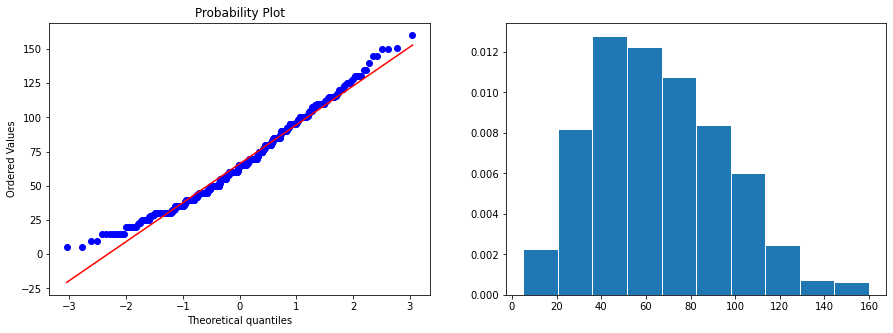

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(121)
probplot(train['speed'], dist='norm', plot=plt)

plt.subplot(122)
plt.hist(train['speed'], density=True, edgecolor='w');

## Plot inicial
Como maneira de visualizar melhor se as variáveis tem relação ao *Target*, plotamos os gráficos *scatterplot* de relação entre as diversas variáveis quantitativas, além de separar por tipos de Pokémon, para ver se com isso conseguíamos visualizar alguma relação, que como se perceberá logo, é bem difícil.

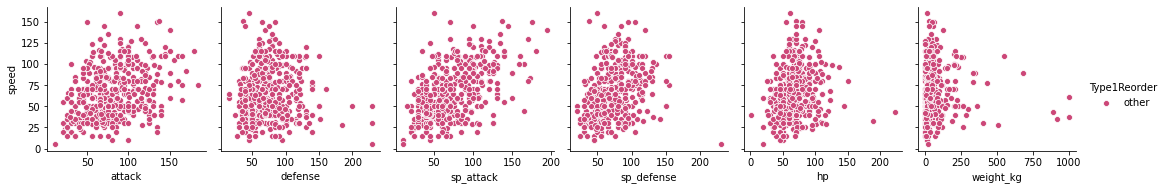

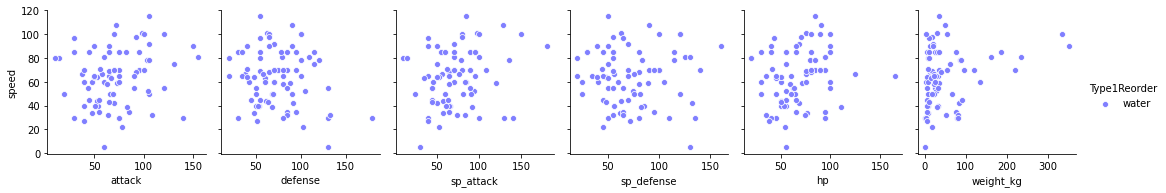

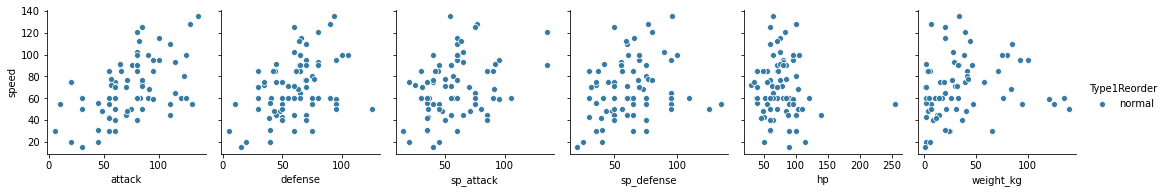

In [26]:
listType1 = train.Type1Reorder.unique()
listType2 = train.Type2Reorder.unique()
colorlist = ['plasma', 'cool', 'mako']

for i in range(3):
    e = listType1[i]
    df = train.loc[train.Type1Reorder==e, :]
    sns.pairplot(df, palette=colorlist[i],
        x_vars=["attack", 'defense', 'sp_attack', 'sp_defense', 'hp', 'weight_kg'],
        y_vars=['speed'],
        hue='Type1Reorder', height=2.5);

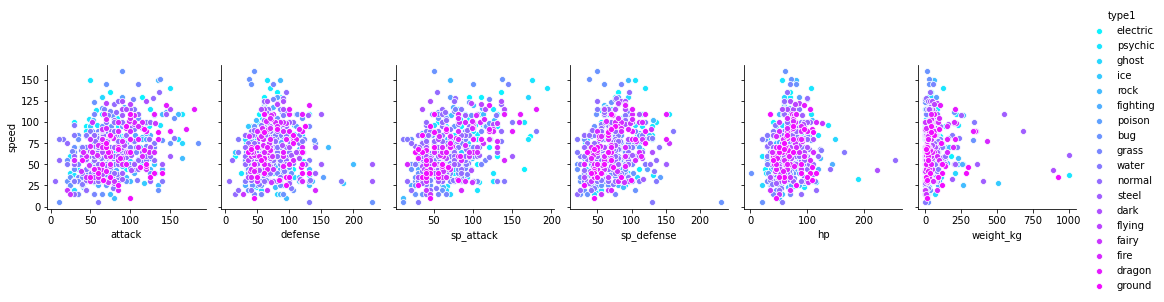

In [27]:
sns.pairplot(train,
        x_vars=["attack", 'defense', 'sp_attack', 'sp_defense', 'hp', 'weight_kg'],
        y_vars=['speed'], palette='cool',hue='type1', height=2.5);

## Regressão
Percebendo que assim não conseguiríamos identificar nenhuma relação, optamos por usar a biblioteca <b>statsmodel.api</b> para fazer a regressão pelo método dos Mínimos Quadrados.

In [40]:
X = train[['attack', 'defense', 'sp_attack', 'sp_defense', 'hp']]

Y = train[['speed']]

In [41]:
def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [42]:
results = regress(Y,X)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.298
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     50.38
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.59e-43
Time:                        19:58:29   Log-Likelihood:                -2757.3
No. Observations:                 600   AIC:                             5527.
Df Residuals:                     594   BIC:                             5553.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.1177      3.539      9.641      0.000      27.167      41.068
attack         0.3002      0.038      7.817      0.000       0.225       0.376
defense       -0.2415      0.042     -5.696      0.000      -0.325      -0.158
sp_attack      0.3038      0.038      8.000      0.000       0.229       0.378
sp_defense     0.1654      0.049      3.356      0.001       0.069       0.262
hp            -0.0990      0.045     -2.176      0.030      -0.188      -0.010
==============================================================================
Omnibus:                       10.286   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.382
Skew:                           0.320   Prob(JB):                      0.00557
Kurtosis:                       3.083   Cond. No.                         603.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Analisando os resultados acima, percebemos que TODOS (com excessão de "hp", mas mesmo assim não por muito) são importantes para definir nossa variável *Target*, ou seja, a velocidade ("speed"). Apesar disso, nosso P é bem pequeno, o que não é um bom sinal, e portanto precisaremos de mais regressões se quisermos atingir a normalidade e poder prever fielmente nosso *Target*.

## Análise Rápida da previsão "como está"
Apenas para visualizarmos, abaixo segue o plot do predict (ou seja, a previsão que a biblioteca $sm$ faz) relacionado com os valores reais do nosso dataframe *teste*.

In [31]:
X_test = test[['attack', 'defense', 'sp_attack', 'sp_defense', 'hp']]

Y_test = test[['speed']]

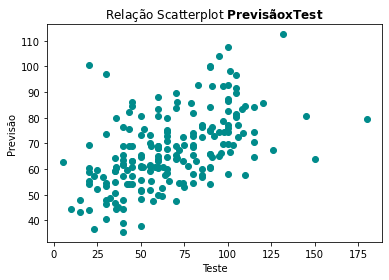

In [81]:
X_cp = sm.add_constant(X_test)
Y_predTest = results.predict(X_cp)

plt.title(r'Relação Scatterplot $\bf{Previsão x Test}$')
plt.xlabel('Teste')
plt.ylabel('Previsão')
plt.scatter(Y_test, Y_predTest, color='darkcyan');

## Aprofundamento na Análise Exploratória
Para aprimorarmos nossa previsão da velocidade dos Pokémons, precisamos também considerar variáveis <b>qualitativas</b>. Porém, a biblioteca $sm$ lida apenas com variáveis <b>quantitativas</b>. Como podemos então transformar essas variáveis para podermos analisar melhor nosso dataframe? A resposta é: com $Dummies$. Dummies é um comando da biblioteca $pandas$ que transforma as strings de uma classificação qualitativa em colunas de um dataframe assumindo valores de 0 ou 1, que equivalem a False e True, respectivamente. Assim, podemos usar essas novas colunas para uma análise exploratória mais aprofundada.

### Type 1

In [82]:
dummies_type1 = pd.get_dummies(train['type1'])
dummies_type2 = pd.get_dummies(train['type2'])

In [84]:
X_Type1 = dummies_type1 
X_Type2 = dummies_type2

In [85]:
results = regress(Y,X_Type1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     2.055
Date:                Tue, 17 Nov 2020   Prob (F-statistic):            0.00754
Time:                        21:37:03   Log-Likelihood:                -2845.8
No. Observations:                 600   AIC:                             5728.
Df Residuals:                     582   BIC:                             5807.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.7723      1.466     43.499      0.000      60.893      66.652
bug           -1.0390      3.743     -0.278      0.781      -8.390       6.312
dark          12.2277      5.873      2.082      0.038       0.693      23.763
dragon        11.0372      6.003      1.839      0.066      -0.752      22.827
electric      15.2277      5.086      2.994      0.003       5.238      25.217
fairy         -8.7009      7.278     -1.195      0.232     -22.996       5.594
fighting      -0.8632      5.873     -0.147      0.883     -12.398      10.672
fire          10.7155      4.416      2.426      0.016       2.042      19.389
flying        35.8944     15.470      2.320      0.021       5.510      66.279
ghost         -4.0354      6.293     -0.641      0.522     -16.395       8.324
grass         -3.6536      3.770     -0.969      0.333     -11.057       3.750
ground        -6.6359      5.873     -1.130      0.259     -18.171       4.899
ice           -3.2723      6.828     -0.479      0.632     -16.683      10.138
normal         5.7344      3.411      1.681      0.093      -0.966      12.434
poison        -1.7288      5.752     -0.301      0.764     -13.026       9.569
psychic        9.0570      4.416      2.051      0.041       0.383      17.731
rock          -2.6890      4.681     -0.574      0.566     -11.883       6.505
steel         -3.4782      6.634     -0.524      0.600     -16.507       9.551
water         -0.0254      3.340     -0.008      0.994      -6.586       6.535
==============================================================================
Omnibus:                       20.838   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.466
Skew:                           0.473   Prob(JB):                     1.32e-05
Kurtosis:                       2.946   Cond. No.                     1.54e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.73e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Analisando a regressão da variável Tipo 1
Analisando essa primeira tabela da regressão, percebe-se uma forte relação dos tipos electric, fire e flying com a velocidade. Seguimos aprofundando na análise. 

In [92]:
X_Type1 = dummies_type1.loc[:, ['electric', 'fire', 'flying']]
results = regress(Y,X_Type1)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     5.200
Date:                Tue, 17 Nov 2020   Prob (F-statistic):            0.00150
Time:                        21:47:57   Log-Likelihood:                -2855.6
No. Observations:                 600   AIC:                             5719.
Df Residuals:                     596   BIC:                             5737.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         64.5532      1.235     52.272      0.000      62.128      66.979
electric      14.4468      5.317      2.717      0.007       4.005      24.888
fire           9.9346      4.592      2.163      0.031       0.915      18.954
flying        35.1134     16.399      2.141      0.033       2.907      67.320
==============================================================================
Omnibus:                       20.637   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.227
Skew:                           0.467   Prob(JB):                     1.49e-05
Kurtosis:                       2.866   Cond. No.                         14.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Type 2

In [86]:
results = regress(Y,X_Type2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     4.241
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.57e-08
Time:                        21:37:07   Log-Likelihood:                -2826.3
No. Observations:                 600   AIC:                             5691.
Df Residuals:                     581   BIC:                             5774.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.5395      1.602     39.050      0.000      59.394      65.685
bug          -11.7395     12.322     -0.953      0.341     -35.941      12.462
dark           5.5319      7.475      0.740      0.460      -9.150      20.213
dragon         7.1878      8.392      0.857      0.392      -9.294      23.669
electric       3.8891     10.449      0.372      0.710     -16.634      24.412
fairy          5.4605      6.041      0.904      0.366      -6.404      17.325
fighting      16.8891      6.173      2.736      0.006       4.765      29.013
fire          16.3176     10.449      1.562      0.119      -4.206      36.841
flying        21.0871      3.538      5.960      0.000      14.139      28.036
ghost         -1.6395      8.786     -0.187      0.852     -18.897      15.618
grass         -7.4145      7.015     -1.057      0.291     -21.193       6.364
ground        -9.3895      6.315     -1.487      0.138     -21.793       3.014
ice           19.0855      9.791      1.949      0.052      -0.144      38.315
normal        21.1271     15.854      1.333      0.183     -10.011      52.266
poison         0.3066      5.592      0.055      0.956     -10.677      11.290
psychic       10.9387      5.917      1.849      0.065      -0.683      22.561
rock         -27.2318      7.745     -3.516      0.000     -42.443     -12.021
steel          9.7462      7.475      1.304      0.193      -4.935      24.428
water         -5.4681      7.475     -0.732      0.465     -20.150       9.213
==============================================================================
Omnibus:                       21.985   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.834
Skew:                           0.487   Prob(JB):                     6.68e-06
Kurtosis:                       2.934   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Analisando a regressão da variável Tipo 2
Analisando essa tabela da regressão, percebe-se uma forte relação dos tipos2 fighting, flying, e rock com a velocidade. Seguimos aprofundando na análise. 

In [93]:
X_Type2 = dummies_type2.loc[:, ['fighting', 'flying', 'rock']]
results = regress(Y,X_Type2)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  speed   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     18.56
Date:                Tue, 17 Nov 2020   Prob (F-statistic):           1.61e-11
Time:                        21:53:53   Log-Likelihood:                -2836.5
No. Observations:                 600   AIC:                             5681.
Df Residuals:                     596   BIC:                             5699.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         63.7047      1.238     51.446      0.000      61.273      66.137
fighting      15.7239      6.114      2.572      0.010       3.716      27.732
flying        19.9220      3.402      5.856      0.000      13.241      26.603
rock         -28.3970      7.710     -3.683      0.000     -43.539     -13.255
==============================================================================
Omnibus:                       24.125   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.277
Skew:                           0.505   Prob(JB):                     1.97e-06
Kurtosis:                       2.823   Cond. No.                         6.96
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""